In [1]:
#!pip install soundfile

In [2]:
#!pip install librosa

In [3]:
#!pip install kaggle

In [4]:
#UPLOAD your kaggle.json file

In [5]:
#!mkdir -p ~/.kaggle
#!cp kaggle.json ~/.kaggle/
#!chmod 600 ~/.kaggle/kaggle.json

In [6]:
# download the data

In [7]:
# kaggle datasets download -d uwrfkaggler/ravdess-emotional-speech-audio

In [8]:
#!kaggle datasets download -d ejlok1/toronto-emotional-speech-set-tess

In [9]:
# from zipfile import ZipFile

# zipped_dataset_path = './toronto-emotional-speech-set-tess.zip'
# with ZipFile(zipped_dataset_path, 'r') as zip:
#     zip.extractall(path='./data/toronto-emotional-speech-set-tess')
#     print('Successfully extracted the dataset.')

In [1]:
import librosa
import pandas as pd 
import numpy as np
import os
import platform
import glob
import time
import seaborn as sns
import IPython.display as ipd
from tqdm import tqdm
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn import metrics 
from sklearn.metrics import confusion_matrix, multilabel_confusion_matrix, ConfusionMatrixDisplay, accuracy_score, recall_score, classification_report, cohen_kappa_score

In [2]:
Ravdess='./data/ravdess-emotional-speech-audio/audio_speech_actors_01-24/'

In [3]:
ravdess_directory_list=os.listdir(Ravdess)


file_emotion=[]
file_path=[]

for dir in ravdess_directory_list:
    actor=os.listdir(Ravdess + dir)
    for file in actor:
        part=file.split('.')[0]
        part=part.split('-')
        file_emotion.append(int(part[2]))
        file_path.append(Ravdess + dir + '/' + file)
        
emotion_df=pd.DataFrame(file_emotion, columns=['Emotions'])

path_df=pd.DataFrame(file_path, columns=['Path'])
Ravdess_df=pd.concat([emotion_df,path_df],axis=1)

Ravdess_df.Emotions.replace({1:'Neutral', 2:'Calm', 3:'Happy', 4:'Sad', 5:'Angry', 6:'Fearful', 7:'Disgust', 8:'Surprised'}, inplace=True)
Ravdess_df.tail()

,Emotions,Path
1435,Surprised,./data/ravdess-emotional-speech-audio/audio_sp...
1436,Surprised,./data/ravdess-emotional-speech-audio/audio_sp...
1437,Surprised,./data/ravdess-emotional-speech-audio/audio_sp...
1438,Surprised,./data/ravdess-emotional-speech-audio/audio_sp...
1439,Surprised,./data/ravdess-emotional-speech-audio/audio_sp...


In [4]:
from plotly import express as px
import plotly 

fig=px.histogram(Ravdess_df,x='Emotions',title='Total number of emotions')
fig.update_layout(xaxis_title='Emotions',yaxis_title='Count',showlegend=False)
#fig.update_traces(marker_color='steelblue')
fig.show()

In [51]:
# plotly.offline.plot(fig, filename='Emotions_count_histogram.html')

First 20 values of y:[-1.6893897e-06 -1.3083032e-05 -1.8255726e-07  1.2910635e-06
 -2.3670905e-06  4.1234516e-06 -1.1606148e-05 -6.5075728e-06
 -1.8186682e-05 -7.4499030e-06 -6.8137829e-06 -2.3397011e-05
  1.5532059e-06 -3.6600898e-07  8.2831747e-08 -3.9027387e-07
  1.6319146e-06 -8.4465164e-06 -9.0837812e-06  3.3813826e-06]
Shape of y: (73574,)
Sample rate: 22050
The file duration is 3.336689342403628 seconds


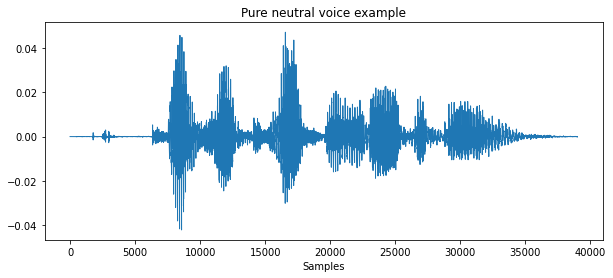

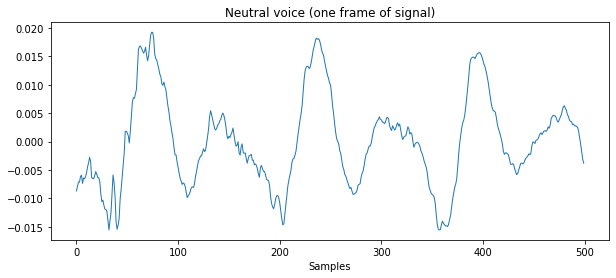

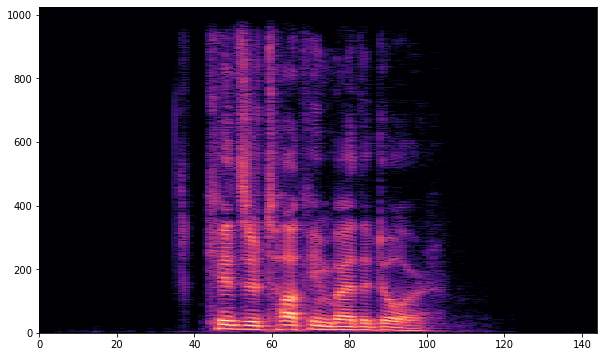

In [5]:
emotion='Neutral'
path=np.array(Ravdess_df.Path[Ravdess_df.Emotions==emotion])[1]

y, sr= librosa.load(path)
print(f'First 20 values of y:{y[:20]}') #Means almost first 20 ms
print(f'Shape of y: {y.shape}')
print(f'Sample rate: {sr}')
duration=librosa.get_duration(y=y,sr=sr)
print(f'The file duration is {duration} seconds')
pd.Series(y[16000:55000]).plot(figsize=(10,4),lw=1,title='Pure neutral voice example',xlabel='Samples')
plt.show()
pd.Series(y[25000:25500]).plot(figsize=(10,4), lw=1, title='Neutral voice (one frame of signal)',xlabel='Samples')
plt.show()
#Spectogram and a mathematical parts.
Y=librosa.stft(y)           #Fourier transform here
S_db=librosa.amplitude_to_db(np.abs(Y), ref=np.max) #Changing amplitude to decibel.
a,ax=plt.subplots(figsize=(10,6))

# img=librosa.display.specshow(S_db,
#                             x_axis='time',
#                             y_axis='log',#wave form after transformation.
#                             #y_axis='linear',
#                             #y_axis='mel',
#                             ax=ax)
# ax.set_title('Spectogram of Neutral voice (freq in log scale)', fontsize=14)
# a.colorbar(img, ax=ax,format=f'%0.2f')
plt.pcolor(S_db,cmap='magma',shading='flat')
plt.show()
ipd.Audio(path)
#Each difference in the graph at the end carries an attribute. Think of it like pixels in pictures

In [53]:
emotion='Angry'
path=np.array(Ravdess_df.Path[Ravdess_df.Emotions==emotion])[1]

y, sr= librosa.load(path)
print(f'First 20 values of y:{y[:20]}') #Means almost first 20 ms
print(f'Shape of y: {y.shape}')
print(f'Sample rate: {sr}')
duration=librosa.get_duration(y=y,sr=sr)
print(f'The file duration is {duration} seconds')

First 20 values of y:[-7.7757134e-10  9.0188290e-10 -9.8375785e-10  1.0579612e-09
 -1.1147550e-09  1.1421015e-09 -1.1425951e-09  1.0979393e-09
 -1.0066817e-09  8.5497431e-10 -6.3359384e-10  3.3232953e-10
  6.3875627e-11 -5.5924265e-10  1.1679941e-09 -1.8953163e-09
  2.7497260e-09 -3.7415884e-09  4.8667959e-09 -6.1291616e-09]
Shape of y: (85345,)
Sample rate: 22050
The file duration is 3.8705215419501133 seconds


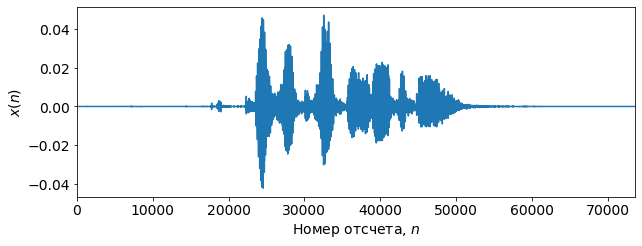

In [21]:
fig,ax=plt.subplots(figsize=(10,3.5))
plt.rcParams.update({'font.size': 14})
# fig,ax=plt.subplots(dpi=100)
plt.plot(y)
plt.xlabel('Номер отсчета, $n$', fontsize=14)
plt.ylabel('$x(n)$', fontsize=14)
plt.xlim([0, len(y)])
# plt.title('$Представление речевого сигнала, выражающего гнев$', fontsize=14)

image_name = f'Doc/figures/speech_signal.jpg'
fig.savefig(image_name, format='jpg', dpi=200, bbox_inches='tight', pad_inches = 0.2) 

# pd.Series(y).plot(figsize=(15,5),lw=1,title='Представление речевого сигнала, выражающего гнев')
plt.show()
# pd.Series(y[40000:40100]).plot(figsize=(10,4), lw=1, title='Angry voice example(approximated)')
# plt.show()
#Spectogram and a mathematical parts.
d=librosa.stft(y) #Fourier transform here
S_db=librosa.amplitude_to_db(np.abs(d), ref=np.max) #Changing ampitude to decibel.



# # a,ax=plt.subplots(figsize=(10,6))
# fig,ax=plt.subplots(figsize=(10,6))
# img=librosa.display.specshow(S_db,
#                             x_axis='time',
#                             y_axis='log',#wave form after transformation.
#                             ax=ax)
# ax.set_title('Спектрограмма речевого сигнала, выражающего гнев', fontsize=14)

# fig.colorbar(img, ax=ax,format=f'%0.2f')
# plt.show()
# ipd.Audio(path)
#Each difference in the graph at the end carries an attribute. Think of it like pixels in pictures

## Plot MFCC

Text(0.5, 1.0, 'Мел-частотные кепстральные коэффициенты (МЧКК) речевого сигнала выражающего гнев')

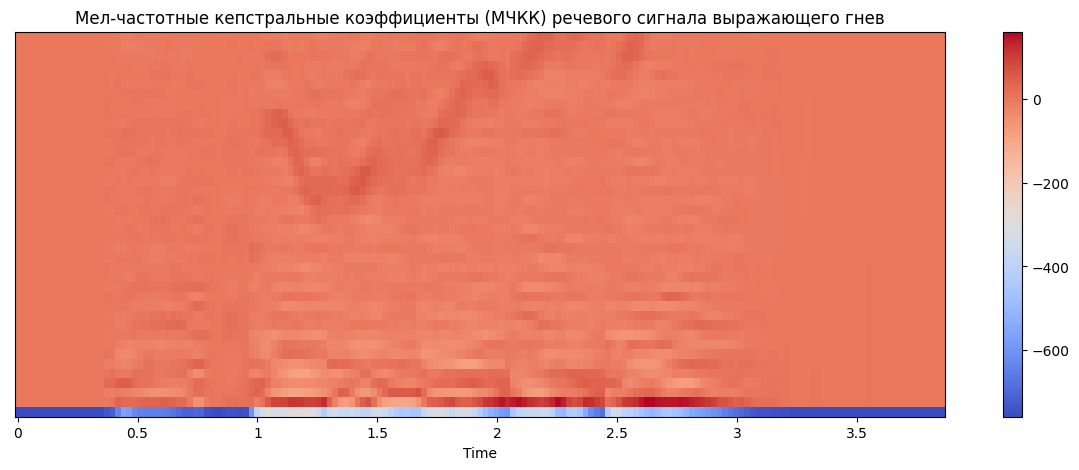

In [55]:
# Calculate MFCCs
mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40)
plt.figure(figsize=(15, 5))
librosa.display.specshow(mfccs, x_axis='time')
plt.colorbar()
plt.title('Мел-частотные кепстральные коэффициенты (МЧКК) речевого сигнала выражающего гнев')

## Averaged vector of MFCCs for signal expressing anger

In [63]:
print('TBD: Усредненный вектор мел-частотных кепстральных коэффициентов (МЧКК)')

TBD: Усредненный вектор мел-частотных кепстральных коэффициентов (МЧКК)


In [2]:
emotions={
  '01':'neutral',
  '02':'calm',
  '03':'happy',
  '04':'sad',
  '05':'angry',
  '06':'fear',
  '07':'disgust',
  '08':'surprised'
}

actors={
  '01':'1',
  '02':'2',
  '03':'3',
  '04':'4',
  '05':'5',
  '06':'6',
  '07':'7',
  '08':'8',
  '09':'9',
  '10':'10',
  '11':'11',
  '12':'12',
  '13':'13',
  '14':'14',
  '15':'15',
  '16':'16',
  '17':'17',
  '18':'18',
  '19':'19',
  '20':'20',
  '21':'21',
  '22':'22',
  '23':'23',
  '24':'24'
}

#defined tess emotions to test on TESS dataset only
tess_emotions=['angry','disgust','fear','ps','happy','sad']

#defined RAVDESS emotions to test on RAVDESS dataset only
ravdess_emotions=['neutral','calm','angry', 'happy','disgust','sad','fear','surprised']

observed_emotions = ['sad','angry','happy','disgust','surprised','neutral','calm','fear']

## Feature extraction </p>
Using librosa package we can extract the MFCC features. This function loads the file give the file path and after resampling and computing MFCC features, returns the features. We have selected the no. of MFCCs as 40.

In [3]:
def extract_feature(file_name, mfcc):
    X, sample_rate = librosa.load(file_name)
    if mfcc:
        mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T, axis=0)
        result = np.hstack((mfccs))
        return result
    else:
        return None

In [4]:
def dataset_options():
    # choose datasets
    ravdess = True
    tess = False
    ravdess_speech = False
    ravdess_song = False
    data = {'ravdess':ravdess, 'ravdess_speech':ravdess_speech, 'ravdess_song':ravdess_song, 'tess':tess}
    print(data)
    return data

In [204]:
def load_data(): 
    x,y=[],[]
    
    # feature to extract
    mfcc = True
    
    data = dataset_options()
    paths = []
    if data['ravdess']:
        if platform.system() == "Windows":
            paths.append("data/ravdess-emotional-speech-audio/audio_speech_actors_01-24/**/*.wav")
        else:    
            paths.append("data/ravdess-emotional-speech-audio/audio_speech_actors_01-24/**/*.wav")
    elif data['ravdess_speech']:
        paths.append("./data/ravdess-emotional-speech-audio/audio_speech_actors_01-24/Actor_*/*.wav")
    elif data['ravdess_song']:
        paths.append("./data/ravdess-emotional-song-audio/audio_song_actors_01-24/Actor_*/*.wav")

    for path in paths:
        for file in glob.glob(path):
            file_name=os.path.basename(file)
            splited_file_name = file_name.split("-")
            emotion=emotions[splited_file_name[2]] #to get emotion according to filename. dictionary emotions is defined above.
            if emotion not in observed_emotions: #options observed_emotions - RAVDESS and TESS, ravdess_emotions for RAVDESS only
                continue
            actor = np.array(actors[splited_file_name[6].split(".")[0]])
            feature=extract_feature(file, mfcc)
            feature = np.hstack((actor, feature))
            x.append(feature)
            y.append(emotion)
    if data['tess']:
        for file in glob.glob("./data/toronto-emotional-speech-set-tess/tess toronto emotional speech set data/TESS Toronto emotional speech set data/*AF_*/*.wav"):
            file_name=os.path.basename(file)
            emotion=file_name.split("_")[2][:-4] #split and remove .wav
            if emotion == 'ps':
                emotion = 'surprised'
            if emotion not in observed_emotions: #options observed_emotions - RAVDESS and TESS, ravdess_emotions for RAVDESS only
                continue
            feature=extract_feature(file, mfcc)
            x.append(feature)
            y.append(emotion)
    return {"X":x,"y":y}

In [205]:
start_time = time.time()

Trial_dict = load_data()

print("--- Data loaded. Loading time: %s seconds ---" % (time.time() - start_time))
X = pd.DataFrame(Trial_dict["X"])
y = pd.DataFrame(Trial_dict["y"])

print("X.shape = ",X.shape)
print("y.shape = ",y.shape)

{'ravdess': True, 'ravdess_speech': False, 'ravdess_song': False, 'tess': False}
--- Data loaded. Loading time: 26.69867205619812 seconds ---
X.shape =  (1440, 41)
y.shape =  (1440, 1)


In [206]:
#renaming first column to actor
X = X.rename(columns = {0: 'actor'})
#renaming the label column to emotion
y=y.rename(columns= {0: 'emotion'})

In [207]:
#concatinating the attributes and label into a single dataframe
data = pd.concat([X, y], axis =1)

In [208]:
data.head()

,actor,1,2,3,4,5,6,7,8,9,...,32,33,34,35,36,37,38,39,40,emotion
0,22,-557.1884,40.043224,-13.310613,-3.9836395,-4.212637,-6.4523616,-14.161658,-14.057115,-16.064396,...,4.0004416,2.3880522,3.6603386,-0.4658301,1.30685,0.9603006,1.6109494,0.16387147,2.0324974,surprised
1,22,-637.4518,44.204132,-4.024809,-0.32443056,0.36266634,-6.112728,-10.918943,-11.571305,-11.5622835,...,4.378252,0.20146437,3.2220192,0.38314724,4.3486953,2.4408624,3.8926067,1.143316,3.9766526,happy
2,22,-685.6952,59.49444,-7.369575,2.7693167,0.5752315,1.9736768,-5.2512774,-10.86035,-10.272999,...,5.6448293,1.2630883,6.0418415,4.0474873,4.603179,2.8035278,3.8976347,-1.0239087,3.1809773,calm
3,22,-496.13885,27.612677,-6.020208,-7.9171457,-2.5657759,-8.113092,-14.132929,-13.038235,-16.511257,...,-1.5595158,-3.1122043,-0.49902257,-0.5763176,5.2297587,2.7110302,2.4072382,-0.40340889,3.5820835,happy
4,22,-536.52545,24.849909,-13.7808485,-5.726333,-3.5046906,-7.594935,-13.912262,-9.721022,-13.198851,...,1.4825264,-0.70006406,1.176922,-0.019219952,3.1245906,1.0621073,-0.8736085,-1.1328259,1.7219942,surprised


## Shuffling data # reindexing to shuffle the data at random
data = data.reindex(np.random.permutation(data.index))

In [209]:
#reindexing to shuffle the data at random
#data = data.reindex(np.random.permutation(data.index))

In [ ]:
# Storing ravdess and tess data to avoid loading again
data.to_csv('./data/ravdess_speech_with_mfcc_and_actors_20230605.csv')

In [5]:
starting_time = time.time()
data = pd.read_csv("./data/ravdess_speech_with_mfcc_and_actors_20230605.csv")

print("data loaded in " + str(time.time()-starting_time) + "ms")

print(data.head())
print("data.shape = ",data.shape)
print("data.columns = ",data.columns)

data loaded in 0.023055553436279297ms
   Unnamed: 0  actor          1          2          3         4         5  \
0           0     22 -557.18840  40.043224 -13.310613 -3.983640 -4.212637   
1           1     22 -637.45180  44.204132  -4.024809 -0.324431  0.362666   
2           2     22 -685.69520  59.494440  -7.369575  2.769317  0.575232   
3           3     22 -496.13885  27.612677  -6.020208 -7.917146 -2.565776   
4           4     22 -536.52545  24.849909 -13.780848 -5.726333 -3.504691   

          6          7          8  ...        32        33        34  \
0 -6.452362 -14.161658 -14.057115  ...  4.000442  2.388052  3.660339   
1 -6.112728 -10.918943 -11.571305  ...  4.378252  0.201464  3.222019   
2  1.973677  -5.251277 -10.860350  ...  5.644829  1.263088  6.041842   
3 -8.113092 -14.132929 -13.038235  ... -1.559516 -3.112204 -0.499023   
4 -7.594935 -13.912262  -9.721022  ...  1.482526 -0.700064  1.176922   

         35        36        37        38        39        40    e

In [6]:
data['actor'].unique()

array([22,  9, 18,  6, 24,  3, 21, 12, 14, 15,  5, 20, 23,  4,  8, 13, 11,
       10,  7,  2, 19,  1, 17, 16])

In [7]:
#dropping the column Unnamed: 0 to removed shuffled index
data = data.drop('Unnamed: 0',axis=1)

In [8]:
data.columns

Index(['actor', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24',
       '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36',
       '37', '38', '39', '40', 'emotion'],
      dtype='object')

In [9]:
#custom K-Fold implementation

def generate_df_groups(df, group_by, n_folds=5):
    grouped_df = df.groupby(group_by)
    df_list = [grouped_df.get_group(x) for x in grouped_df.groups]
    return df_list

def combine_df_group(dataframes_list, group_members):
    result_k_folds= dict()
    for group, members in group_members.items():
        mathced_dataframes = []  
        combined_df = pd.DataFrame()
        for df in dataframes_list:
            member =  df['actor'].iloc[0]
            if member in members:
                df = df.drop('actor', axis = 1)
                mathced_dataframes.append(df)
        combined_df = pd.concat(mathced_dataframes)
        result_k_folds[group] = combined_df
    return result_k_folds

In [10]:
group_members={
  '0': {2, 5, 14, 15, 16},
  '1': {3, 6, 7, 13, 18},
  '2': {10, 11, 12, 19, 20},
  '3': {8, 17, 21, 23, 24},
  '4': {1, 4, 9, 22} 
}


groupby_column = 'actor'
grouped_dfs = generate_df_groups(data, groupby_column)
k_folds =  combine_df_group(grouped_dfs, group_members) 
len(k_folds)

5

In [11]:
k_folds['0']

,1,2,3,4,5,6,7,8,9,10,...,32,33,34,35,36,37,38,39,40,emotion
1140,-538.60986,35.791790,-22.749155,3.738360,-11.058676,-8.571917,-3.436534,-8.093794,-5.611845,-3.854676,...,4.392126,2.768126,2.979635,0.803183,1.885802,-0.112445,0.959430,0.905584,1.671297,surprised
1141,-584.80950,43.184870,-21.301863,8.527552,-6.874347,-6.161052,-4.632482,-12.898245,-4.476371,-3.367257,...,0.821191,2.046581,4.492945,2.167103,0.477532,-2.868844,1.677926,0.793322,0.883367,happy
1142,-549.81213,47.068962,-15.313465,-0.723726,-11.330709,-5.243441,-13.013495,-15.761160,-5.324899,-2.736969,...,3.930759,3.979556,5.849032,2.646413,1.832819,0.179960,0.873388,0.608038,1.871978,disgust
1143,-638.03485,46.499240,-9.892578,4.896696,-6.414650,-5.070762,-6.280470,-10.606287,-6.077464,-3.233131,...,3.426708,-0.413187,0.326665,0.679241,5.510340,0.693461,2.524421,-0.813037,0.369436,neutral
1144,-656.98860,45.869490,-5.477190,4.314228,-4.462320,-3.557982,-6.703658,-8.853257,-6.026569,-2.597284,...,5.964401,2.801718,3.216421,2.179547,5.056561,1.450398,4.394240,1.622772,3.152053,calm
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1435,-582.65540,40.385452,-6.514301,3.869540,-6.550285,-10.057136,-12.808718,-11.570229,-5.127690,-3.605541,...,0.420599,-2.422531,0.581025,-1.021814,2.093266,-0.950691,-1.465519,-2.204353,0.717654,surprised
1436,-425.36636,28.141975,-18.408752,2.342423,-10.613114,-12.770654,-4.541979,-13.798555,-12.134354,3.646712,...,0.927721,-0.833560,-1.244822,-1.633735,2.255361,0.575409,1.630236,0.623465,1.579002,angry
1437,-533.97754,34.282670,-6.814039,2.452864,-9.102087,-14.345847,-14.975832,-4.984300,-8.458524,-7.266214,...,0.886026,-2.285188,-1.286188,-0.880745,0.781697,0.682115,-0.103449,-0.588359,1.016153,surprised
1438,-625.21250,44.119790,0.448556,9.450166,-4.976931,-10.867088,-12.835262,-6.066405,-6.245358,-6.137948,...,2.101449,1.473541,0.461234,-0.793729,0.907035,0.246125,3.481506,3.861028,3.470598,disgust


In [12]:
train_set_0 = pd.concat([k_folds['0'], k_folds['1'], k_folds['2'], k_folds['3']])
test_set_0 = k_folds['4']

train_set_1 = pd.concat([k_folds['0'], k_folds['1'], k_folds['2'], k_folds['4']])
test_set_1 = k_folds['3']

train_set_2 = pd.concat([k_folds['0'], k_folds['1'], k_folds['3'], k_folds['4']])
test_set_2 = k_folds['2']

train_set_3 = pd.concat([k_folds['0'], k_folds['2'], k_folds['3'], k_folds['4']])
test_set_3 = k_folds['1']

train_set_4 = pd.concat([k_folds['1'], k_folds['2'], k_folds['3'], k_folds['4']])
test_set_4 = k_folds['0']

In [13]:
from sklearn.svm import SVC
import time
import seaborn as sn

In [14]:
X_train_0 = train_set_0.drop('emotion', axis = 1).values
y_train_0 = train_set_0['emotion'].values
X_test_0 = test_set_0.drop('emotion', axis = 1).values
y_test_0 = test_set_0['emotion'].values

svclassifier_0 = SVC(kernel = 'linear')

starting_time = time.time()
svclassifier_0.fit(X_train_0, y_train_0)
print("Trained model in %s ms " % str(time.time() - starting_time))
y_pred_0 = svclassifier_0.predict(X_test_0)

Trained model in 13.430214166641235 ms 


In [15]:
print(recall_score(y_test_0, y_pred_0, average="macro"))

0.2578125


In [16]:
X_train_1 = train_set_1.drop('emotion', axis = 1).values
y_train_1 = train_set_1['emotion'].values
X_test_1 = test_set_1.drop('emotion', axis = 1).values
y_test_1 = test_set_1['emotion'].values

svclassifier_1 = SVC(kernel = 'linear')

starting_time = time.time()
svclassifier_1.fit(X_train_1, y_train_1)
print("Trained model in %s ms " % str(time.time() - starting_time))
y_pred_1 = svclassifier_1.predict(X_test_1)

Trained model in 15.995506525039673 ms 


In [17]:
print(recall_score(y_test_1, y_pred_1, average="macro"))

0.365625


In [18]:
X_train_2 = train_set_2.drop('emotion', axis = 1).values
y_train_2 = train_set_2['emotion'].values
X_test_2 = test_set_2.drop('emotion', axis = 1).values
y_test_2 = test_set_2['emotion'].values

svclassifier_2 = SVC(kernel = 'linear')

starting_time = time.time()
svclassifier_2.fit(X_train_2, y_train_2)
print("Trained model in %s ms " % str(time.time() - starting_time))
y_pred_2 = svclassifier_2.predict(X_test_2)

Trained model in 10.566440105438232 ms 


In [19]:
print(recall_score(y_test_2, y_pred_2, average="macro"))

0.39375


In [20]:
X_train_3 = train_set_3.drop('emotion', axis = 1).values
y_train_3 = train_set_3['emotion'].values
X_test_3 = test_set_3.drop('emotion', axis = 1).values
y_test_3 = test_set_3['emotion'].values

svclassifier_3 = SVC(kernel = 'linear')

starting_time = time.time()
svclassifier_3.fit(X_train_3, y_train_3)
print("Trained model in %s ms " % str(time.time() - starting_time))
y_pred_3 = svclassifier_3.predict(X_test_3)

Trained model in 12.878795862197876 ms 


In [21]:
print(recall_score(y_test_3, y_pred_3, average="macro"))

0.30624999999999997


In [22]:
X_train_4 = train_set_4.drop('emotion', axis = 1).values
y_train_4 = train_set_4['emotion'].values
X_test_4 = test_set_4.drop('emotion', axis = 1).values
y_test_4 = test_set_4['emotion'].values

svclassifier_4 = SVC(kernel = 'linear')

starting_time = time.time()
svclassifier_4.fit(X_train_4, y_train_4)
print("Trained model in %s ms " % str(time.time() - starting_time))
y_pred_4 = svclassifier_4.predict(X_test_4)

Trained model in 11.21600341796875 ms 


In [23]:
print(recall_score(y_test_4, y_pred_4, average="macro"))

0.35000000000000003


## Combine model results and plot confusion matrix

In [24]:
y_pred_combined = np.concatenate((y_pred_0, y_pred_1, y_pred_2, y_pred_3, y_pred_4), axis=None)
len(y_pred_combined)

1440

In [25]:
y_test_combined = np.concatenate((y_test_0, y_test_1, y_test_2, y_test_3, y_test_4), axis=None)
len(y_test_combined)

1440

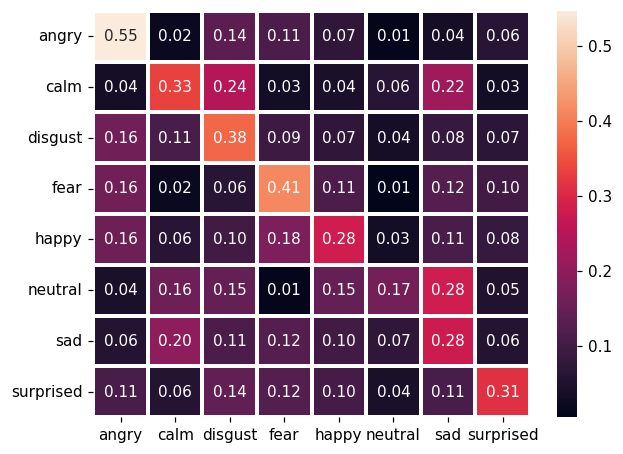

In [26]:
labels = np.unique(y_test_combined)
cm = confusion_matrix(y_test_combined, y_pred_combined, normalize='true', labels=labels)

df_cm_4 = pd.DataFrame(cm,columns = labels, index = labels)
fig,ax = plt.subplots(dpi = 110)
sn.heatmap(df_cm_4, annot=True, fmt='.2f',linewidth=1.5)
plt.show()

In [34]:
print(recall_score(y_test_combined, y_pred_combined, average="macro"))

0.337890625


# OLD (legacy) version

In [33]:
#separating features and target outputs
X = data.drop('emotion', axis = 1).values
y = data['emotion'].values

In [34]:
y

array(['calm', 'angry', 'sad', ..., 'fear', 'angry', 'disgust'],
      dtype=object)

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [36]:
X.shape, y.shape

((1440, 20), (1440,))

In [37]:
np.unique(y)

array(['angry', 'calm', 'disgust', 'fear', 'happy', 'neutral', 'sad',
       'surprised'], dtype=object)

X variable contains attributes while y variable contains corresponding labels.

Once the data is divided into attributes and labels, the final preprocessing step is to divide data into training and test sets. The model_selection library of the Scikit-Learn library contains the train_test_split method that allows us to divide data into training and test sets.

In [38]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30)

It is the time to train our SVM on the training data. Scikit-Learn contains the svm library, which contains built-in classes for different SVM algorithms. Since we are going to perform a classification task, we will use the support vector classifier class, which is written as SVC in the Scikit-Learn's svm library. We have set the kernel to linear.

In [39]:
from sklearn.svm import SVC

svclassifier = SVC(kernel = 'rbf', C=0.001)

In [40]:
import time

starting_time = time.time()
svclassifier.fit(X_train, y_train)
print("Trained model in %s ms " % str(time.time() - starting_time))

Trained model in 7.878281593322754 ms 


In [41]:
y_pred = svclassifier.predict(X_test)

Confusion matrix, precision, recall, and F1 measures are the most commonly used metrics for classification tasks. Scikit-Learn's metrics library contains the classification_report and confusion_matrix methods, which can be readily used to find out the values for these important metrics. We have used the following code for finding these metrics:

In [49]:
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
import seaborn as sn

print(classification_report(y_test,y_pred))

acc = float(accuracy_score(y_test,y_pred))*100
print("----accuracy score %s ----" % acc)

              precision    recall  f1-score   support

       angry       0.69      0.70      0.69        69
        calm       0.49      0.47      0.48        72
     disgust       0.41      0.50      0.45        60
        fear       0.39      0.44      0.41        54
       happy       0.41      0.31      0.36        51
     neutral       0.15      0.17      0.16        23
         sad       0.27      0.20      0.23        59
   surprised       0.37      0.39      0.38        44

    accuracy                           0.43       432
   macro avg       0.40      0.40      0.39       432
weighted avg       0.43      0.43      0.42       432

----accuracy score 42.824074074074076 ----


# Confusion matrix

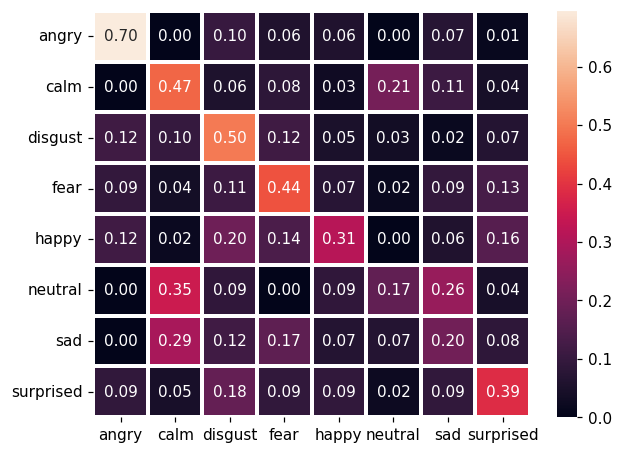

In [50]:
cm = confusion_matrix(y_test,y_pred,normalize='true',labels=labels)

df_cm = pd.DataFrame(cm,columns = labels, index = labels)
fig,ax = plt.subplots(dpi = 110)
sn.heatmap(df_cm, annot=True, fmt='.2f',linewidth=1.5)
plt.show()

In [51]:
mcm = multilabel_confusion_matrix(y_test, y_pred,
                            labels=labels)
mcm

array([[[341,  22],
        [ 21,  48]],

       [[324,  36],
        [ 38,  34]],

       [[328,  44],
        [ 30,  30]],

       [[340,  38],
        [ 30,  24]],

       [[358,  23],
        [ 35,  16]],

       [[386,  23],
        [ 19,   4]],

       [[341,  32],
        [ 47,  12]],

       [[359,  29],
        [ 27,  17]]])

In [52]:
import plotting_utils as plt_util

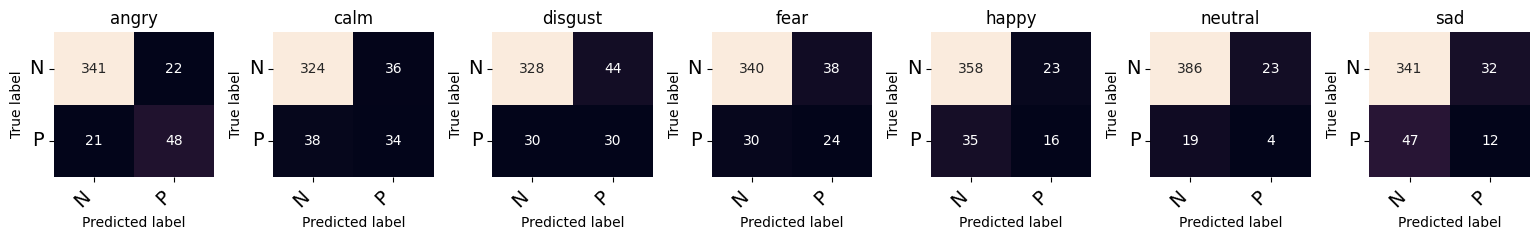

In [53]:
labels = np.unique(y)
#translated_labels = ['Гнев', 'Отвращение', 'Страх', 'Счастье', 'Нейтральность', 'Грусть', 'Удивление']
fig, ax = plt.subplots(1, 7, figsize=(15.5, 2.5))
for axes, cfs_matrix, label in zip(ax.flatten(), mcm, labels):
    plt_util.print_multiclass_confusion_matrix(cfs_matrix, axes, label, ["N", "P"])
fig.tight_layout()
plt.show()   

In [54]:
print(recall_score(y_test, y_pred, average="macro"))

0.39871385514077


In [55]:
cm

array([[0.69565217, 0.        , 0.10144928, 0.05797101, 0.05797101,
        0.        , 0.07246377, 0.01449275],
       [0.        , 0.47222222, 0.05555556, 0.08333333, 0.02777778,
        0.20833333, 0.11111111, 0.04166667],
       [0.11666667, 0.1       , 0.5       , 0.11666667, 0.05      ,
        0.03333333, 0.01666667, 0.06666667],
       [0.09259259, 0.03703704, 0.11111111, 0.44444444, 0.07407407,
        0.01851852, 0.09259259, 0.12962963],
       [0.11764706, 0.01960784, 0.19607843, 0.1372549 , 0.31372549,
        0.        , 0.05882353, 0.15686275],
       [0.        , 0.34782609, 0.08695652, 0.        , 0.08695652,
        0.17391304, 0.26086957, 0.04347826],
       [0.        , 0.28813559, 0.11864407, 0.16949153, 0.06779661,
        0.06779661, 0.20338983, 0.08474576],
       [0.09090909, 0.04545455, 0.18181818, 0.09090909, 0.09090909,
        0.02272727, 0.09090909, 0.38636364]])

## Random Forest

In [56]:
from sklearn.ensemble import RandomForestClassifier
  
 # create regressor object 
classifier = RandomForestClassifier(n_estimators = 100, random_state = 0) 
  
# fit the regressor with x and y data 
classifier.fit(X_train, y_train)   

c_p = classifier.predict(X_test) 


print(accuracy_score(y_true=y_test,y_pred=c_p))
print(classification_report(y_test,c_p)) 
# creating a confusion matrix 
print(confusion_matrix(y_test,c_p) )

0.6134259259259259
              precision    recall  f1-score   support

       angry       0.74      0.61      0.67        69
        calm       0.67      0.81      0.73        72
     disgust       0.63      0.65      0.64        60
        fear       0.67      0.61      0.64        54
       happy       0.57      0.59      0.58        51
     neutral       0.50      0.39      0.44        23
         sad       0.55      0.39      0.46        59
   surprised       0.48      0.70      0.57        44

    accuracy                           0.61       432
   macro avg       0.60      0.59      0.59       432
weighted avg       0.62      0.61      0.61       432

[[42  4  7  3  5  0  2  6]
 [ 0 58  0  3  3  4  3  1]
 [ 3  6 39  1  3  1  2  5]
 [ 3  1  4 33  4  0  4  5]
 [ 6  1  0  2 30  0  3  9]
 [ 0  4  2  0  3  9  3  2]
 [ 0 12  7  5  4  3 23  5]
 [ 3  1  3  2  1  1  2 31]]
